In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

**Read dataset**

In [4]:
filtered_clothing = pd.read_csv('../filtered_clothing_dataset.csv')

**Split dataset in training and testing set**

In [5]:
eighty_pct = int(0.8*len(filtered_clothing))
  
train_set = filtered_clothing.iloc[:(eighty_pct-1), :] 
test_set = filtered_clothing.iloc[eighty_pct:, :] 
  
train_set.to_csv("train_data.csv", index=False)
test_set.to_csv("test_data.csv", index=False)

**Loading the dataset**

In [6]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [7]:
# image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data['id'] = train_data['id'].astype(str) + '.jpg'
test_data['id'] = test_data['id'].astype(str) + '.jpg'

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='../filtered_images',
    x_col="id",
    y_col="subCategory",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory='../filtered_images',
    x_col="id",
    y_col="subCategory",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 22344 validated image filenames belonging to 5 classes.
Found 5587 validated image filenames belonging to 5 classes.


**Defining the CNN model**

In [31]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')  # 5 categories in the dataset
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,681,093 (36.93 MB)

 Trainable params: 9,681,093 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

**Model training**

In [33]:
# number of training and validation steps
train_steps = train_generator.samples // batch_size
test_steps = test_generator.samples // batch_size

# model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_steps)

Epoch 1/5


C:\Users\catal\anaconda3\envs\fashion_product_images_small\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


698/698 ━━━━━━━━━━━━━━━━━━━━ 963s 1s/step - accuracy: 0.8792 - loss: 0.4122 - val_accuracy: 0.9776 - val_loss: 0.0772
Epoch 2/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step - accuracy: 0.9688 - loss: 0.0295 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 3/5


C:\Users\catal\anaconda3\envs\fashion_product_images_small\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


698/698 ━━━━━━━━━━━━━━━━━━━━ 820s 1s/step - accuracy: 0.9735 - loss: 0.0944 - val_accuracy: 0.9840 - val_loss: 0.0619
Epoch 4/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 1s 303us/step - accuracy: 1.0000 - loss: 0.0170 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 5/5
698/698 ━━━━━━━━━━━━━━━━━━━━ 850s 1s/step - accuracy: 0.9804 - loss: 0.0643 - val_accuracy: 0.9858 - val_loss: 0.0720


**Save model**

In [34]:
model.save('CNN_model_25032024.keras')
print("Saving the model as CNN_model_25032024")

Saving the model as CNN_model_25032024


**Model evaluation**

In [96]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

174/174 ━━━━━━━━━━━━━━━━━━━━ 37s 210ms/step - accuracy: 0.9854 - loss: 0.0764
Test Loss: 0.07193481177091599
Test Accuracy: 0.9858117699623108


**Random things I tried**

In [97]:
# getting the label mapping
labels = train_generator.class_indices

# initializing a dictionary to store the accuracies per label
accuracies_per_label = {}

# evaluating the accuracy per label
for label, index in labels.items():
    print(f"Evaluating accuracy for label: {label}")
    
    # filtering the test data for the current label
    filtered_test_data = test_data[test_data['subCategory'] == label]
    
    # initializing a generator for the filtered test data
    filtered_test_generator = test_datagen.flow_from_dataframe(
        dataframe=filtered_test_data,
        directory='../filtered_images',
        x_col="id",
        y_col="subCategory",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')
    
    # evaluating the accuracy on the filtered test data
    test_loss, test_accuracy = model.evaluate(filtered_test_generator)
    print(f"Test Accuracy for label {label}: {test_accuracy}")
    
    # storing the accuracy in a dictionary
    accuracies_per_label[label] = test_accuracy

print("Accuracy per Label:")
for label, accuracy in accuracies_per_label.items():
    print(f"{label}: {accuracy}")

pd.DataFrame.from_dict(accuracies_per_label, orient='index', columns=['Accuracy']).to_csv('accuracies_per_label.csv')


Evaluating accuracy for label: Bags
Found 553 validated image filenames belonging to 1 classes.


C:\Users\catal\anaconda3\envs\fashion_product_images_small\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.9892 - loss: 78.4002
Test Accuracy for label Bags: 0.9855334758758545
Evaluating accuracy for label: Bottomwear
Found 489 validated image filenames belonging to 1 classes.


C:\Users\catal\anaconda3\envs\fashion_product_images_small\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 0.0000e+00 - loss: 86.5527
Test Accuracy for label Bottomwear: 0.0
Evaluating accuracy for label: Dress
Found 79 validated image filenames belonging to 1 classes.


C:\Users\catal\anaconda3\envs\fashion_product_images_small\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.0283 - loss: 24.3553
Test Accuracy for label Dress: 0.025316456332802773
Evaluating accuracy for label: Shoes
Found 1875 validated image filenames belonging to 1 classes.


C:\Users\catal\anaconda3\envs\fashion_product_images_small\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - accuracy: 0.0029 - loss: 87.7860
Test Accuracy for label Shoes: 0.002133333357051015
Evaluating accuracy for label: Topwear
Found 2591 validated image filenames belonging to 1 classes.


C:\Users\catal\anaconda3\envs\fashion_product_images_small\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 252ms/step - accuracy: 0.0011 - loss: 78.5972
Test Accuracy for label Topwear: 0.0027016596868634224
Accuracy per Label:
Bags: 0.9855334758758545
Bottomwear: 0.0
Dress: 0.025316456332802773
Shoes: 0.002133333357051015
Topwear: 0.0027016596868634224


In [90]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

175/175 ━━━━━━━━━━━━━━━━━━━━ 36s 206ms/step


In [91]:
conf_matrix = confusion_matrix(test_generator.classes, predicted_labels)

In [94]:
label_to_clothing = {
    0: 'Dress',
    1: 'Shoes',
    2: 'Topwear',
    3: 'Bags',
    4: 'Bottomwear'
}

In [95]:
num_labels = len(label_to_clothing)
label_accuracies = {}

for i in range(num_labels):
    label_total = np.sum(conf_matrix[i])
    label_correct = conf_matrix[i][i]
    label_accuracy = label_correct / label_total if label_total > 0 else 0
    label_accuracies[label_to_clothing[i]] = label_accuracy

for label, accuracy in label_accuracies.items():
    print(f"Accuracy for {label}: {accuracy:.4f}")

Accuracy for Dress: 0.1157
Accuracy for Shoes: 0.1043
Accuracy for Topwear: 0.0000
Accuracy for Bags: 0.3445
Accuracy for Bottomwear: 0.4821


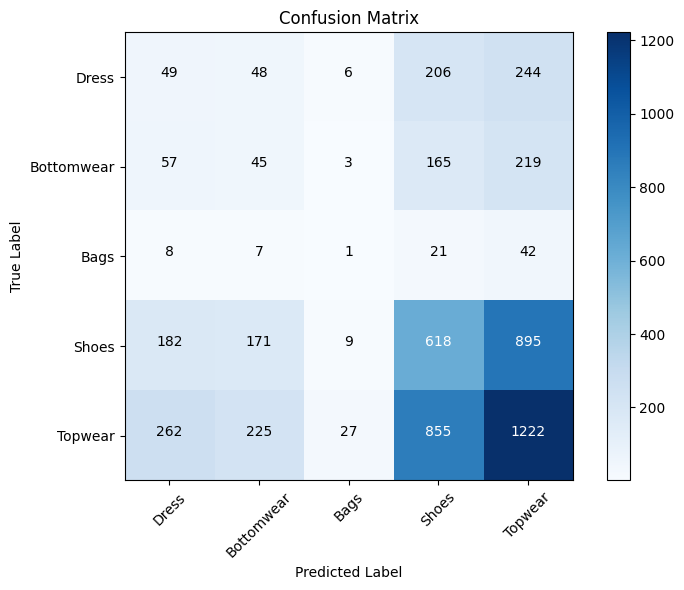

In [52]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_to_clothing))
plt.xticks(tick_marks, label_to_clothing.values(), rotation=45)
plt.yticks(tick_marks, label_to_clothing.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(label_to_clothing)):
    for j in range(len(label_to_clothing)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

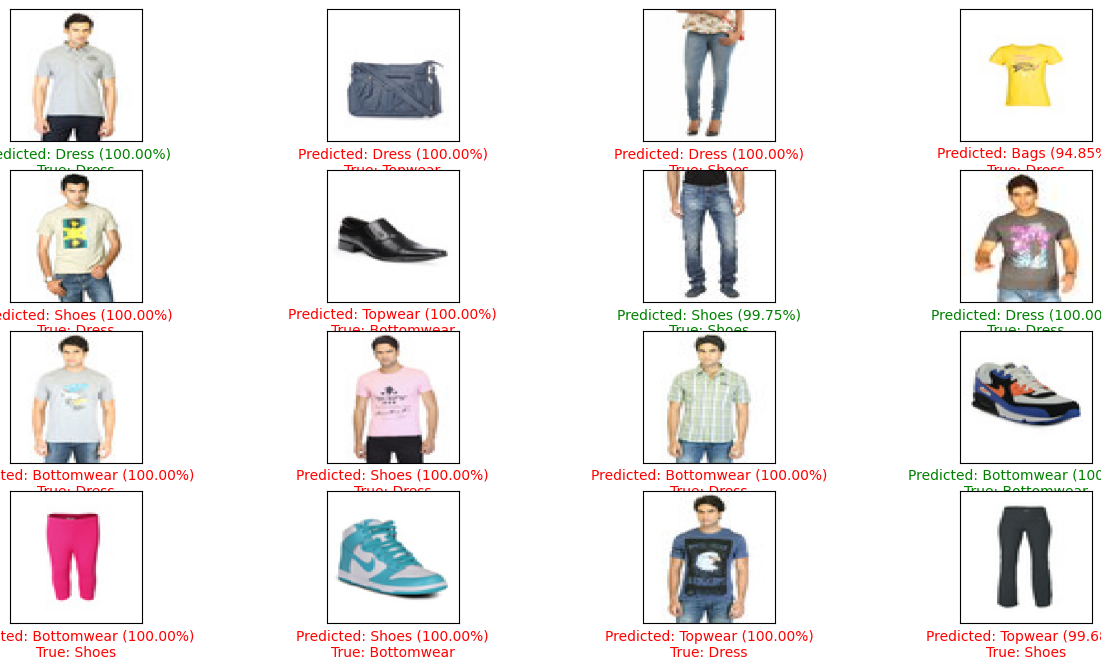

In [81]:
num_rows = 4
num_cols = 4
num_images = num_rows * num_cols

# visualizing the predictions
def plot_image(generator, i, predictions_array):
    img, true_label = generator[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    predicted_clothing = label_to_clothing[predicted_label]
    true_clothing = label_to_clothing[np.argmax(true_label)]
    
    if predicted_label == np.argmax(true_label):
        color = 'green'
    else:
        color = 'red'
    
    # computing the confidence scores
    predicted_prob = np.max(predictions_array) * 100
    
    plt.xlabel(f'Predicted: {predicted_clothing} ({predicted_prob:.2f}%)\nTrue: {true_clothing}', color=color)

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(test_generator, i, predictions[i])
plt.show()



